# Objectifs du jour PRise en main de scikit-learn

- Aller sur la page de la documentation et regarder l'organisation de la page.
- Regarder la distinction entre régression et classification.
- Regarder l'API commune de tous les modèles.
- Reproduire l'entrainement déjà effectué.
- En utilisant:
    - `LinearRegression`
    - `RidgeRegression`
    - `Lasso` 
    - `ElasticNet` 
    - `KNeighborsRegressor` 
    - `SVR` 
    - `RandomForestRegressor` 
    - `MLPRegressor` 
    - `KernelRidge`
          

## Rapide prise en main de sklearn

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
from sklearn.pipeline import Pipeline

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
from sklearn.model_selection import train_test_split 

In [88]:
from sklearn.model_selection import cross_val_score

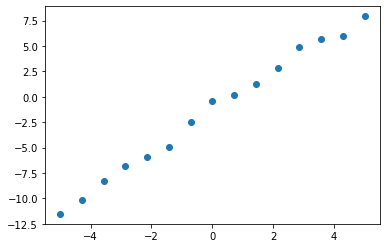

In [4]:
x = np.linspace(-5, 5, 15) 
y = 2 * x - 1.5 + np.random.randn(15) *0.5
plt.scatter(x, y)

In [5]:
modele = LinearRegression()

In [6]:
dir(modele)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'score',
 'set_params']

In [8]:
X = x.reshape(-1, 1)
X

array([[-5.        ],
       [-4.28571429],
       [-3.57142857],
       [-2.85714286],
       [-2.14285714],
       [-1.42857143],
       [-0.71428571],
       [ 0.        ],
       [ 0.71428571],
       [ 1.42857143],
       [ 2.14285714],
       [ 2.85714286],
       [ 3.57142857],
       [ 4.28571429],
       [ 5.        ]])

In [9]:
modele.fit(X, y)

LinearRegression()

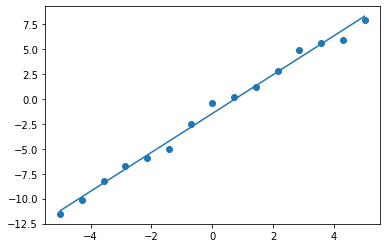

In [10]:
x_aff = np.linspace(-5, 5, 1000)
y_aff = modele.predict(x_aff.reshape(-1, 1))
plt.plot(x_aff, y_aff)
plt.scatter(x, y)

In [11]:
modele.coef_

array([1.9516845])

In [12]:
modele.intercept_

-1.4568129074617933

In [13]:
modele.score(X, y)

0.9929021315067912

In [14]:
modele.score(x_aff.reshape(-1, 1), 2 * x_aff.reshape(-1, 1) - 1.5)

0.9993605611209272

In [15]:
modele.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

## Apprentissage polynomial

In [23]:
gauche = -1.
droite = 2.
nb_points = 30

def cible(x):
    return np.exp(1 / (2 + np.cos(7 * x) * np.sin(20 * x)))

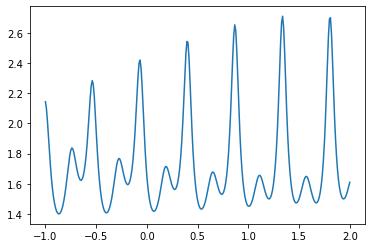

In [22]:
x_aff = np.linspace(gauche, droite, 300)
y_aff = cible(x_aff)
plt.plot(x_aff, y_aff)

In [25]:
x = np.random.uniform(low=gauche, high=droite, size=(nb_points, 1))
x

array([[ 1.99506064],
       [ 0.29311516],
       [ 1.65476489],
       [-0.28527099],
       [ 1.0157774 ],
       [ 0.69201286],
       [ 0.58476518],
       [ 1.18083215],
       [ 0.02154116],
       [ 0.35572696],
       [ 1.51231351],
       [-0.51846354],
       [ 1.65647458],
       [-0.89709202],
       [ 1.52361446],
       [ 1.7823577 ],
       [ 0.45335407],
       [-0.1589366 ],
       [-0.76980001],
       [ 1.93904776],
       [-0.05747633],
       [ 0.8966843 ],
       [ 1.05529169],
       [-0.92243536],
       [ 0.54316995],
       [ 0.4418785 ],
       [ 0.87698018],
       [ 1.86832351],
       [ 1.83564167],
       [ 0.30969591]])

(30, 1) (30, 1)


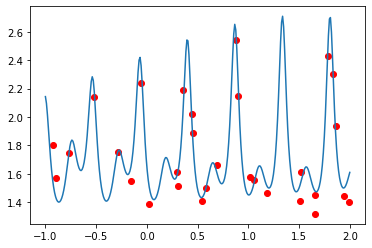

In [30]:
y = cible(x) + np.random.normal(size=x.shape) * 0.1
x_aff = np.linspace(gauche, droite, 300)
y_aff = cible(x_aff)
plt.plot(x_aff, y_aff)
print(x.shape, y.shape)
plt.scatter(x, y, color="red")

In [31]:
modele_bateau = LinearRegression()
modele_bateau.fit(x, y)

LinearRegression()

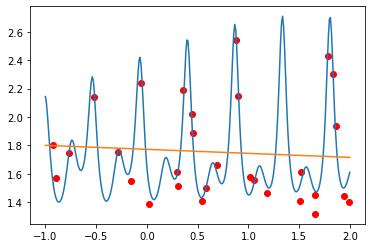

In [34]:
plt.plot(x_aff, y_aff)
plt.scatter(x, y, color="red")
plt.plot(x_aff, modele_bateau.predict(x_aff.reshape(-1, 1)))

In [35]:
modele_bateau.score(x, y)

0.0052135955056916705

In [36]:
modele_bateau.score(x_aff.reshape(-1, 1), y_aff)

-0.021151520652767264

**REMARQUE** l'apprentissage polynomial est en fait une régression linéaire sur un X possédant des "features" supplémentaires qui sont les puissances successives de x.

In [38]:
polynome = PolynomialFeatures(degree=2)

In [49]:
X = polynome.fit_transform(x)
X

array([[ 1.00000000e+00,  1.99506064e+00,  3.98026697e+00],
       [ 1.00000000e+00,  2.93115162e-01,  8.59164979e-02],
       [ 1.00000000e+00,  1.65476489e+00,  2.73824684e+00],
       [ 1.00000000e+00, -2.85270985e-01,  8.13795350e-02],
       [ 1.00000000e+00,  1.01577740e+00,  1.03180374e+00],
       [ 1.00000000e+00,  6.92012865e-01,  4.78881805e-01],
       [ 1.00000000e+00,  5.84765175e-01,  3.41950310e-01],
       [ 1.00000000e+00,  1.18083215e+00,  1.39436456e+00],
       [ 1.00000000e+00,  2.15411639e-02,  4.64021742e-04],
       [ 1.00000000e+00,  3.55726964e-01,  1.26541673e-01],
       [ 1.00000000e+00,  1.51231351e+00,  2.28709216e+00],
       [ 1.00000000e+00, -5.18463539e-01,  2.68804442e-01],
       [ 1.00000000e+00,  1.65647458e+00,  2.74390802e+00],
       [ 1.00000000e+00, -8.97092016e-01,  8.04774085e-01],
       [ 1.00000000e+00,  1.52361446e+00,  2.32140101e+00],
       [ 1.00000000e+00,  1.78235770e+00,  3.17679896e+00],
       [ 1.00000000e+00,  4.53354066e-01

In [41]:
modele = LinearRegression(fit_intercept=False)
modele.fit(X, y)

LinearRegression(fit_intercept=False)

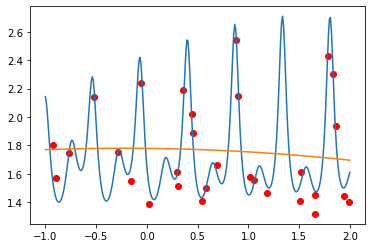

In [42]:
plt.plot(x_aff, y_aff)
plt.scatter(x, y, color="red")
plt.plot(x_aff, modele.predict(polynome.transform(x_aff.reshape(-1, 1))))

In [44]:
tuyau = Pipeline(
    steps=[
        ("Generation puissances", PolynomialFeatures(degree=2)),
        ("Régression linéaire", LinearRegression(fit_intercept=False)),
    ]
)

In [45]:
dir(tuyau)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_is_fitted__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_can_inverse_transform',
 '_can_transform',
 '_check_feature_names',
 '_check_fit_params',
 '_check_n_features',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_param_names',
 '_get_params',
 '_get_tags',
 '_iter',
 '_log_message',
 '_more_tags',
 '_pairwise',
 '_replace_estimator',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_params',
 '_sk_visual_block_',
 '_validate_data',
 '_validate_names',
 '_validate_steps',
 'classe

In [46]:
tuyau.fit(x, y)

Pipeline(steps=[('Generation puissances', PolynomialFeatures()),
                ('Régression linéaire', LinearRegression(fit_intercept=False))])

In [47]:
tuyau.score(x, y)

0.006613005717589493

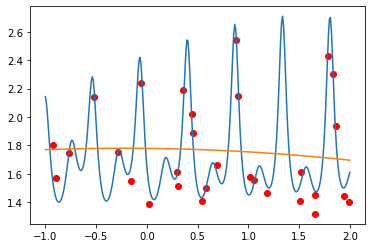

In [48]:
plt.plot(x_aff, y_aff)
plt.scatter(x, y, color="red")
plt.plot(x_aff, tuyau.predict(x_aff.reshape(-1, 1)))

**QUESTION** afficher la courbe des scores d'apprentissages et d'affichage par rapport au degrés du polynom.

In [84]:
def courbe_apprentissage(degres: list[int], cible=cible, nb_points: int = 30):
    gauche = -1.
    droite = 2.
    #x = np.random.uniform(low=gauche, high=droite, size=(nb_points, 1))
    x = np.linspace(gauche, droite, nb_points).reshape(-1, 1)
    y = cible(x) + np.random.normal(size=x.shape) * 0.1
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
    scores_test = list()
    scores_app = list()
    for degre in degres:
        tuyau = Pipeline(
            steps=[
                ("Normalisation", MinMaxScaler(feature_range=(-0.9, 0.9))),
                ("Generation puissances", PolynomialFeatures(degree=degre)),
                ("Régression linéaire", LinearRegression(fit_intercept=False)),
            ]
        )
        tuyau.fit(x_train, y_train)
        scores_app.append(tuyau.score(x_train, y_train))
        scores_test.append(tuyau.score(x_test, y_test))
        
    fig, rep = plt.subplots(figsize=(12, 8))
    rep.plot(degres, scores_app, label="apprentissage")
    rep.plot(degres, scores_test, label="test")
    rep.set_ylim(-1.1, 1.1)
    rep.legend()
        
    

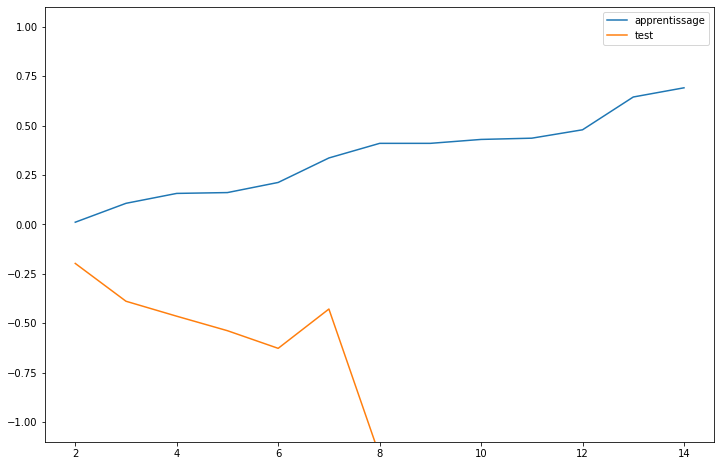

In [85]:
courbe_apprentissage(degres=[d for d in range(2, 15)])

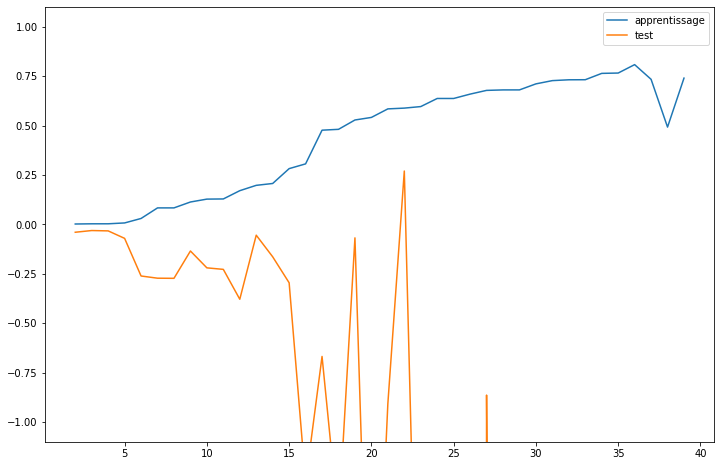

In [86]:
courbe_apprentissage(degres=[d for d in range(2, 40)], nb_points=100)

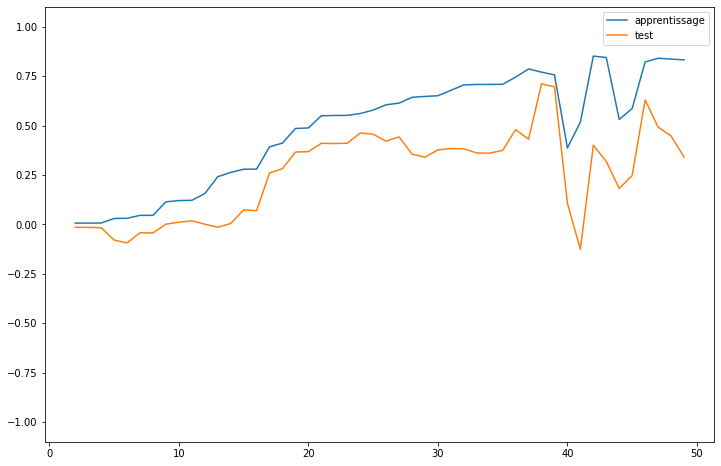

In [87]:
courbe_apprentissage(degres=[d for d in range(2, 50)], nb_points=200)

**QUESTION** utiliser `cross_val_score` pour sélectionner le meilleur modèle par rapport au degré et à la normalisation en utilisant juste l'échantillon d'entrainement. Utiliser ensuite l'échantillon de test pour détecter s'il est en surapprentissage.